In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
file_path = "cleaned_multiple_columns_data.csv"
data = pd.read_csv(file_path)

In [26]:
# - Label Encoding untuk kolom Gender
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [27]:
data = pd.get_dummies(data, columns=['Stress_Level', 'Work_Location', 'Job_Role'], drop_first=True)


In [28]:
X = data.drop('Mental_Health_Condition', axis=1)  # Fitur
y = data['Mental_Health_Condition']  # Target

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = rf_classifier.predict(X_test)

In [32]:
# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")

Akurasi: 0.40


In [33]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

     Anxiety       0.30      0.27      0.29        11
     Burnout       0.50      0.58      0.54        19
  Depression       0.25      0.20      0.22        10

    accuracy                           0.40        40
   macro avg       0.35      0.35      0.35        40
weighted avg       0.38      0.40      0.39        40



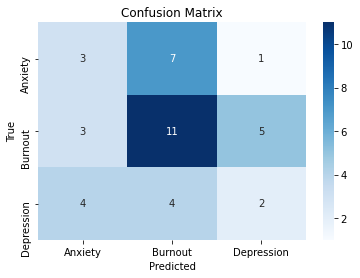

In [34]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()